<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Coding-Sorting-Algorithms" data-toc-modified-id="Coding-Sorting-Algorithms-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Coding Sorting Algorithms</a></span></li></ul></div>

In [1]:
# Import libraries
import time
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Coding Sorting Algorithms

The following sorting algorithms are coded below:

* Selection Sort
* Insertion Sort
* Merge Sort
* Quick Sort
* Counting Sort


In [2]:
# https://www.geeksforgeeks.org/selection-sort/
def selection_sort(alist):
    # First iteration through the list  
    for i in range(len(alist)):
        # Set minimum index value to i (starts at 0)
        min_index = i 
        # Second iteration through the list for comparison of each element to the first iteration 
        for j in range(i+1, len(alist)):
            if alist[min_index] > alist[j]:
                # min_index becomes the value of j index
                min_index = j
            # this for loop continues until all elements have been checked and min_index contains the lowest valued element
        # the index and min-index elements are swapped
        alist[i], alist[min_index] = alist[min_index], alist[i]

In [3]:
def insertion_sort(alist):
    for index in range(1,len(alist)):
        
        currentvalue = alist[index]
        position = index

        while position > 0 and alist[position-1] > currentvalue:
            alist[position]=alist[position-1]
            position = position-1

        alist[position]=currentvalue

In [4]:
# Adapted from https://runestone.academy/runestone/books/published/pythonds/SortSearch/TheMergeSort.html?highlight=merge%20sort
# and https://www.geeksforgeeks.org/merge-sort/

def merge_sort(alist):
    # Base case - if list is 1 or less, it is sorted by default
    if len(alist) > 1:

        # Get midpoint of the list with integer division
        midpoint = len(alist) // 2
    
        # Splitting the list in half using the midpoint
        left_list = alist[:midpoint]
        right_list = alist[midpoint:]

        # Recursively split the left_list and right_list until the base case is reached
        merge_sort(left_list)
        merge_sort(right_list)
        # At the end of the recursion, all lists will contain a maximum of 1 element and thus be sorted.

        # Code below merges the smaller sorted lists into larger sorted lists
        l = 0     # Index value for left_list
        r = 0     # Index value for right_list
        a = 0     # Index value for alist

        """Compare left and right lists, merging smaller sorted lists to become larger sorted lists, 
           eventually placing the sorted elements back into alist"""
        while l < len(left_list) and r < len(right_list):
            if left_list[l] <= right_list[r]: # keeps algorithm stable, maintaining order of alist 
                alist[a] = left_list[l]
                l += 1
            else:
                alist[a] = right_list[r]
                r += 1
            a += 1

        # Some lists will not have a left/right counterpart and so will be dealt with below       
        while l < len(left_list):
            alist[a] = left_list[l]
            l += 1
            a += 1

        while r < len(right_list):
            alist[a] = right_list[r]
            r += 1
            a += 1
        # The original list has now been sorted

In [5]:
# https://runestone.academy/runestone/books/published/pythonds/SortSearch/TheQuickSort.html?highlight=quicksort

def quick_sort(alist):
    quickSortHelper(alist,0,len(alist)-1)

def quickSortHelper(alist,first,last):
    if first<last:

        splitpoint = partition(alist,first,last)

        quickSortHelper(alist,first,splitpoint-1)
        quickSortHelper(alist,splitpoint+1,last)


def partition(alist,first,last):
    pivotvalue = alist[first]

    leftmark = first+1
    rightmark = last

    done = False
    while not done:

        while leftmark <= rightmark and alist[leftmark] <= pivotvalue:
            leftmark = leftmark + 1

        while alist[rightmark] >= pivotvalue and rightmark >= leftmark:
            rightmark = rightmark -1

        if rightmark < leftmark:
            done = True
        else:
            temp = alist[leftmark]
            alist[leftmark] = alist[rightmark]
            alist[rightmark] = temp

    temp = alist[first]
    alist[first] = alist[rightmark]
    alist[rightmark] = temp


    return rightmark


In [6]:
# https://www.w3resource.com/python-exercises/data-structures-and-algorithms/python-search-and-sorting-exercise-10.php
def counting_sort(alist, max_val=100):
    m = max_val + 1
    count = [0] * m                
    
    for a in alist:
    # count occurences
        count[a] += 1             
    i = 0
    for a in range(m):            
        for c in range(count[a]):  
            alist[i] = a
            i += 1
    return alist

In [7]:
# Create an array of size n consisting of random integers between the values 0-99  
def random_array(n):

    array = []
    
    for i in range(0, n):
        array.append(random.randint(0, 100))
    
    return array

In [8]:
# Input sizes
n_size = [100, 250, 500, 750, 1000]#, 1250, 2500, 3750, 5000, 6250, 7500, 8750, 10000]

In [9]:
def benchmarking(sorting_func):
    
    # List to contain the running times for each algorithm
    sort_times = []

    # Time test for each sorting algorithm
    for n in n_size:
        start_time = time.time()
        sorting_func(random_array(n))
        end_time = time.time()
        time_elapsed = (end_time - start_time) * 1000
        sort_times.append(time_elapsed)
    
    return sort_times

In [10]:
def average_time(sort):
    
    times = []

    # Calculate benchmarking 10 times
    for i in range(0, 10):
        time = benchmarking(sort)
        times.append(time) 
    
    arr_times = np.array(times)
    
    print(arr_times)
    average = np.mean(arr_times, axis=0)
    
    return average

In [11]:
all_algorithms = [insertion_sort, selection_sort, merge_sort, quick_sort, counting_sort]

all_averages = []

for a in all_algorithms:
    result = average_time(a)
    all_averages.append(result)

    
print(all_averages)

[[ 0.          2.98762321 10.01191139 24.89447594 40.89045525]
 [ 0.          3.0298233   9.9773407  24.89566803 46.91004753]
 [ 0.99539757  2.98023224  9.98497009 26.89146996 43.92170906]
 [ 0.          2.95257568  9.01293755 25.89416504 42.91963577]
 [ 0.          2.00247765 10.96606255 22.93801308 42.88744926]
 [ 0.99515915  1.99651718 10.98036766 23.93007278 41.89014435]
 [ 0.          2.98953056  8.97455215 22.94039726 41.89062119]
 [ 0.          2.94685364 10.01429558 22.93920517 43.84303093]
 [ 0.          2.03418732 10.98227501 23.92482758 41.88632965]
 [ 0.          2.98905373 10.96057892 23.90980721 40.91763496]]
[[ 1.01900101  1.01423264  8.96930695 16.94655418 29.92892265]
 [ 0.          1.99174881  8.94451141 22.93944359 57.84606934]
 [ 0.99825859  2.99096107 13.96393776 33.90836716 38.92683983]
 [ 0.          1.99437141  7.94768333 16.95466042 29.94704247]
 [ 0.          1.96695328  8.01873207 15.94853401 30.91692924]
 [ 0.          1.99484825  7.94744492 16.98279381 28.9

In [12]:
algorithms = ['Insertion Sort', 'Selection Sort', 'Merge Sort', 'Quick Sort', 'Counting Sort']

df = pd.DataFrame(all_averages, columns=n_size, index=algorithms)

In [13]:
df.round(3)

,100,250,500,750,1000
Insertion Sort,0.199,2.691,10.187,24.316,42.796
Selection Sort,0.497,1.890,8.674,18.952,34.214
Merge Sort,0.199,1.000,1.999,3.498,4.776
Quick Sort,0.096,0.697,1.491,1.798,2.897
Counting Sort,0.100,0.595,0.298,1.004,1.099


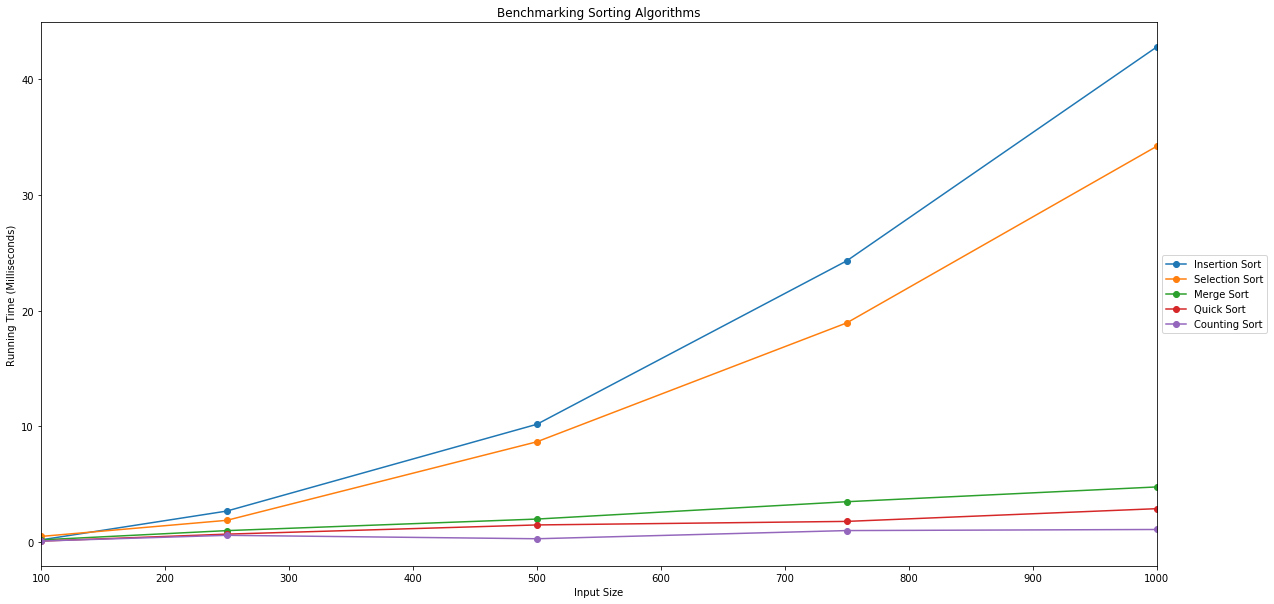

In [14]:
# https://stackoverflow.com/a/31734795
# https://stackoverflow.com/a/43610256
plot = df.iloc[:].T.plot(title="Benchmarking Sorting Algorithms", figsize=(20, 10), style='-o')
plot.set(xlabel="Input Size", ylabel="Running Time (Milliseconds)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.xticks(n_size)
plt.show()

The results for Merge, Quick and Counting sorts above are very close to one another along the entire length of the plot above, making it difficult to discern any differences between them. To get a clearer picture, the plot below shows only the results of these algorithm implementations. 

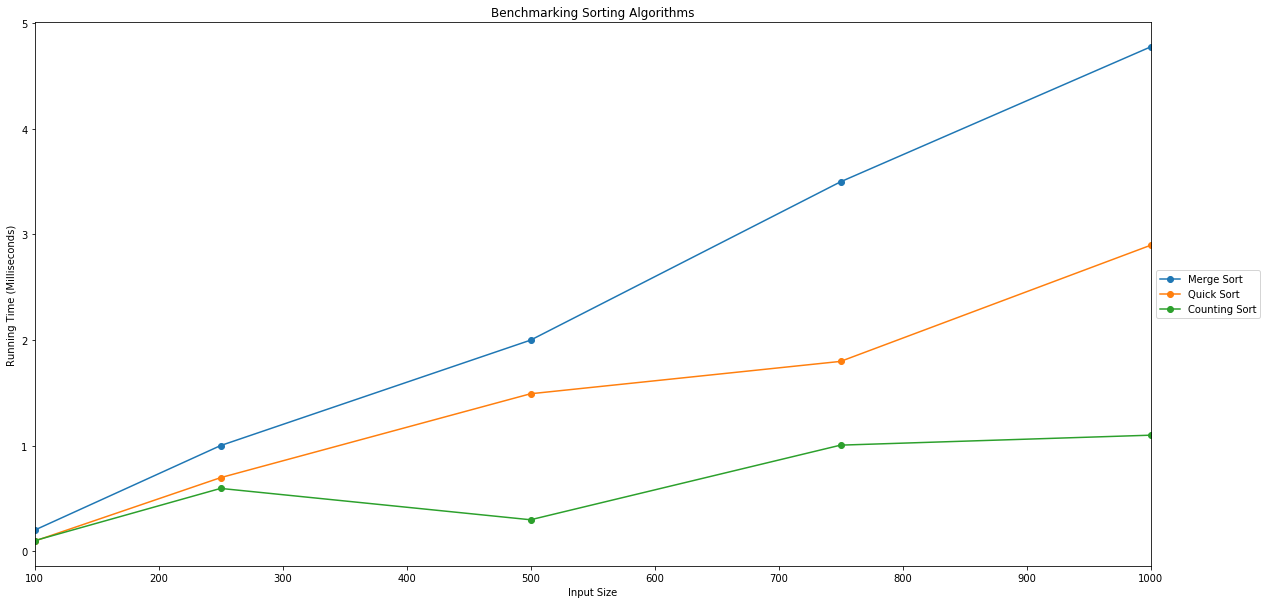

In [15]:
plot = df.iloc[2:5].T.plot(title="Benchmarking Sorting Algorithms", figsize=(20, 10), style='-o')
plot.set(xlabel="Input Size", ylabel="Running Time (Milliseconds)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.xticks(n_size)
plt.show()

Similarly, it might be interesting to get a closer look at the differences between the algorithms for input values of 1000 and lower. In this instance smaller input numbers of 10 and 50 are added to test the  simple comparison functions' abilities to sort smaller input lists faster than 

In [16]:
n_size = [5, 10, 15, 20]

In [17]:
all_algorithms = [insertion_sort, selection_sort, merge_sort, quick_sort, counting_sort]

all_averages = []

for a in all_algorithms:
    result = average_time(a)
    all_averages.append(result)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.96654892 0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         1.02090836 0.         0.        ]]
[[0.         0.97155571 0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.99682808 0.        ]
 [

In [18]:
algorithms = ['Insertion Sort', 'Selection Sort', 'Merge Sort', 'Quick Sort', 'Counting Sort']

df = pd.DataFrame(all_averages, columns=n_size, index=algorithms)

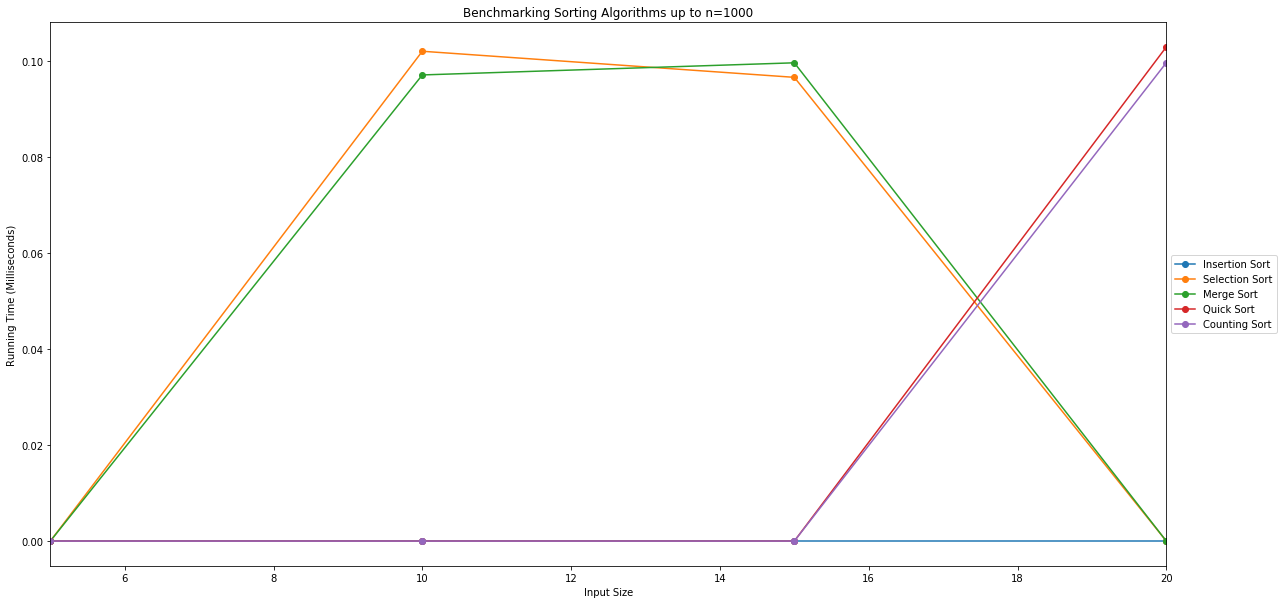

In [19]:
plot = df.iloc[:].T.plot(title="Benchmarking Sorting Algorithms up to n=1000", figsize=(20, 10), style='-o')
plot.set(xlabel="Input Size", ylabel="Running Time (Milliseconds)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.xticks(n_size)
plt.show()